In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [33]:
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from keras.utils import to_categorical

batch_size = 128
num_classes = 10
epochs = 20

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


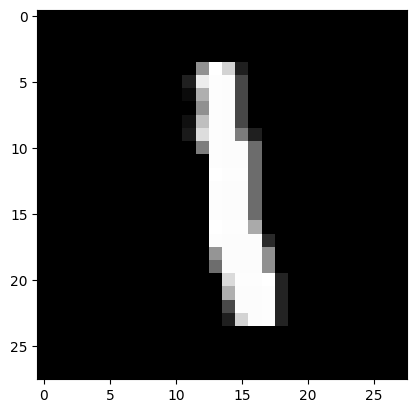

In [34]:
plt.gray()
plt.imshow(x_train[6])

In [35]:
#Reshape
# 28 x 28 , or we could set/ x_train = x_train.reshape(-1,28,28). x_train = x_train.reshape(-1, 28*28)

x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [36]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [37]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [38]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 11s 22ms/step - loss: 1.2132 - accuracy: 0.6865 - val_loss: 0.5408 - val_accuracy: 0.8695
Epoch 2/20
469/469 [==============================] - 13s 28ms/step - loss: 0.5348 - accuracy: 0.8497 - val_loss: 0.3760 - val_accuracy: 0.8984
Epoch 3/20
469/469 [==============================] - 12s 25ms/step - loss: 0.4253 - accuracy: 0.8774 - val_loss: 0.3241 - val_accuracy: 0.9096
Epoch 4/20
469/469 [==============================] - 16s 34ms/step - loss: 0.3770 - accuracy: 0.8911 - val_loss: 0.2958 - val_accuracy: 0.9166
Epoch 5/20
469/469 [==============================] - 16s 35ms/step - loss: 0.3428 - accuracy: 0.9009 - val_loss: 0.2740 - val_accuracy: 0.9222
Epoch 6/20
469/469 [==============================] - 8s 17ms/step - loss: 0.3198 - accuracy: 0.9075 - val_loss: 0.2570 - val_accuracy: 0.9262
Epoch 7/20
469/469 [==============================] - 10s 21ms/step - loss: 0.3024 - accuracy: 0.9125 - val_loss: 0.2431 - val_accuracy: 

In [40]:
score = model.evaluate(x_test, y_test,verbose=0)
print(f"Test accuracy: {score[1]}")
print(f"Test loss: {score[0]}")


Test accuracy: 0.95660001039505
Test loss: 0.1455812305212021
